In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, Normalizer, scale,MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
cd=pd.read_csv('creditcard.csv')

In [4]:
cd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#check missing values
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
import matplotlib.pyplot as plt
count_classes=pd.value_counts(cd['Class'],sort=True)

count_classes.plot(kind='bar',rot=0)
plt.title('fraud classes distribution')
plt.xlabel('class')
plt.ylabel('Counts')
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
cd.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
fraud_data=cd[cd['Class']==1]
valid_data=cd[cd['Class']==0]

In [9]:
#fraud distribution percentage
print(f'fraud transaction: {round(len(fraud_data)/len(cd)*100,2)}% of the transactions ')
print(f'valid transaction: {round(len(valid_data)/len(cd)*100,2)}% of the transactions ')

fraud transaction: 0.17% of the transactions 
valid transaction: 99.83% of the transactions 


In [10]:
#drop time column
cd.drop('Time',axis=1,inplace=True)

In [11]:
#normalize Amount column
scaler=StandardScaler()
cd['Amount']=scaler.fit_transform(cd['Amount'].values.reshape(-1,1))

In [12]:
cd.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [13]:
#split dataset for traning and testing with ratio of 7:3
X=cd.iloc[:,:-1]
y=cd.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y, test_size=.3, stratify=y, random_state=1)

# Resampling for imbalanced data -oversampling

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
Xtrain_oversample, ytrain_oversample = ros.fit_sample(Xtrain,ytrain)

In [16]:
ytrain_oversample.value_counts(dropna=False, normalize=True)

1    0.5
0    0.5
Name: Class, dtype: float64

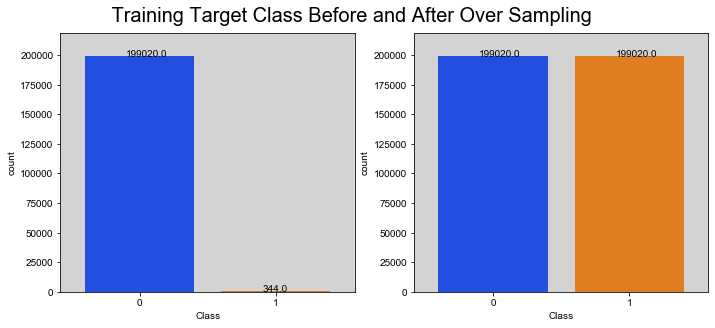

In [17]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4.5))
fig.subplots_adjust(bottom=0.10, left=0.10, top = 0.900, right=1.00)
fig.suptitle(' Training Target Class Before and After Over Sampling', fontsize = 20)
sns.set_palette("bright")
sns.countplot(ytrain, ax=ax1)
ax1.margins(0.1)
ax1.set_facecolor('#d3d3d3')
for p in ax1.patches:
        ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+60))
sns.set_palette("bright")
sns.countplot(ytrain_oversample, ax=ax2)
ax2.margins(0.1)
ax2.set_facecolor('#d3d3d3')
for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+60))
sns.set_style('dark')

In [18]:

print(Xtrain_oversample.shape,ytrain_oversample.shape)


(398040, 29) (398040,)


# Feature selection

## correlation values method

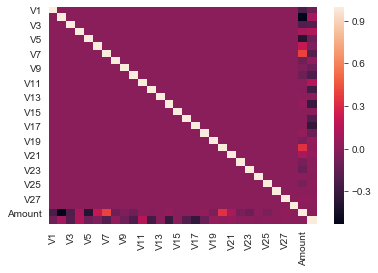

In [19]:
corr = cd.corr()
sns.heatmap(corr)

In [20]:
import statsmodels.api as sm

#Use sm.Logit (add ‘Intercept=1’ in the input features) and check all coefficients.
X['Intercept']=1
logistic_ml=sm.Logit(y,X)
logistic_coef=logistic_ml.fit()
logistic_coef.summary2()

Optimization terminated successfully.
         Current function value: 0.003919
         Iterations 13


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.692    
Dependent Variable: Class            AIC:              2292.2821
Date:               2020-12-09 15:26 BIC:              2609.0691
No. Observations:   284807           Log-Likelihood:   -1116.1  
Df Model:           29               LL-Null:          -3621.2  
Df Residuals:       284777           LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     13.0000                                     
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
V1           0.0837    0.0415    2.0160  0.0438   0.0023   0.1650
V2           0.0130    0.0578    0.2256  0.8215  -0.1003   0.1264
V3           0.0384    0.0455    0.8448  0.3982  -0.0507   0.1276
V4           0.7059    0.0737    9.5782  0.0000   0.5615   0.8503
V5           0.1020    0.0654    1.5594  0.1189  -0.0262   0.2301
V6          -0.1229    0.0758   -1.6212  0.1050  -0.2714   0.0257
V7          -0.1107    0.0661   -1.6742  0.0941  -0.2402   0.0189
V8          -0.1683    0.0305   -5.5106  0.0000  -0.2281  -0.1084
V9          -0.2609    0.1099   -2.3748  0.0176  -0.4762  -0.0456
V10         -0.8188    0.0970   -8.4389  0.0000  -1.0090  -0.6286
V11         -0.0123    0.0760   -0.1622  0.8712  -0.1612   0.1365
V12          0.0693    0.0861    0.8052  0.4207  -0.0994   0.2381
V13         -0.3200    0.0813   -3.9367  0.0001  -0.4793  -0.1607
V14         -0.5451    0.0616   -8.8431  0.0000  -0.6659  -0.4243
V15         -0.0853    0.0840   -1.0159  0.3097  -0.2499   0.0793
V16         -0.1936    0.1248   -1.5508  0.1209  -0.4383   0.0511
V17          0.0024    0.0686    0.0351  0.9720  -0.1321   0.1369
V18         -0.0373    0.1277   -0.2919  0.7704  -0.2875   0.2130
V19          0.0764    0.0958    0.7972  0.4253  -0.1114   0.2641
V20         -0.4473    0.0815   -5.4877  0.0000  -0.6070  -0.2875
V21          0.3675    0.0580    6.3343  0.0000   0.2538   0.4812
V22          0.5787    0.1282    4.5144  0.0000   0.3274   0.8299
V23         -0.0901    0.0575   -1.5680  0.1169  -0.2027   0.0225
V24          0.1384    0.1491    0.9282  0.3533  -0.1539   0.4307
V25         -0.0449    0.1286   -0.3488  0.7273  -0.2970   0.2072
V26         -0.0034    0.1893   -0.0178  0.9858  -0.3744   0.3677
V27         -0.8052    0.1226   -6.5678  0.0000  -1.0455  -0.5649
V28         -0.2943    0.0893   -3.2950  0.0010  -0.4693  -0.1192
Amount       0.2284    0.0929    2.4584  0.0140   0.0463   0.4106
Intercept   -8.6497    0.1458  -59.3433  0.0000  -8.9354  -8.3640
================================================================

"""

99% confidece level, we choose p-value<0.01, based on the table above, we will choose **'V4','V8','V10','V13','V14','V20','V21','V22','V27'** those features

In [21]:
Xtrain_coe=Xtrain_oversample[['V4','V8','V10','V13','V14','V20','V21','V22','V27']]
Xtest_coe=Xtest[['V4','V8','V10','V13','V14','V20','V21','V22','V27']]

## Select KBest method

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#Feature selection using SelectKBest
test = SelectKBest(score_func=f_classif, k=6)
label=Xtrain.columns.values
fit = test.fit(Xtrain_oversample,ytrain_oversample)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

[8.604e+04 1.190e+05 1.823e+05 3.898e+05 5.637e+04 6.538e+04 1.065e+05
 1.069e+03 1.548e+05 2.414e+05 3.201e+05 3.160e+05 1.361e+03 4.910e+05
 7.991e+02 1.938e+05 1.592e+05 9.431e+04 2.940e+04 8.214e+03 7.670e+03
 4.741e+00 2.696e+02 3.435e+03 1.664e+02 1.730e+02 2.854e+03 5.396e+03
 2.175e+03]


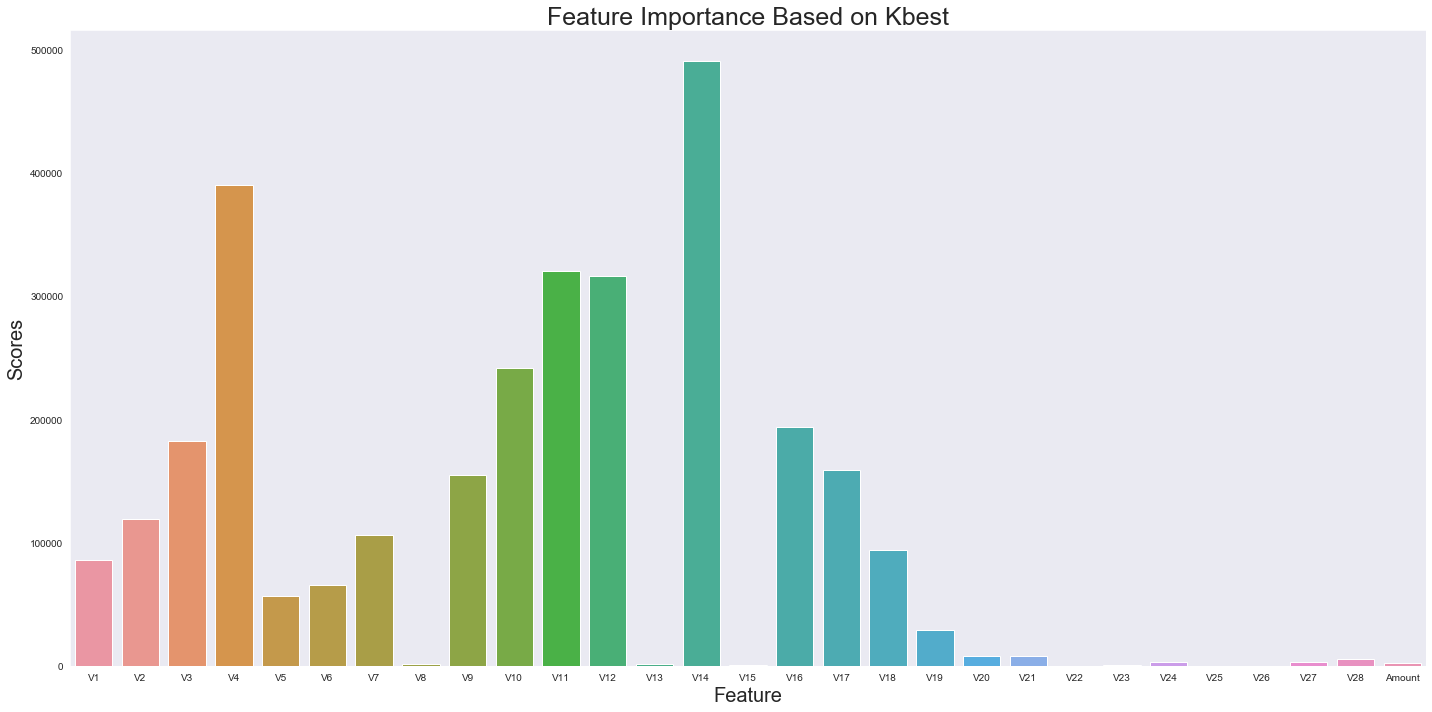

In [23]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.barplot(x=label, 
            y=fit.scores_)
# set labels
plt.xlabel("Feature", size=20)
plt.ylabel("Scores", size=20)
plt.title("Feature Importance Based on Kbest", size=25)
plt.tight_layout()

In [24]:
#select top 6 from bar chart
Xtrain_kb=Xtrain_oversample[['V4','V10','V11','V12','V14','V16']]
Xtest_kb=Xtest[['V4','V10','V11','V12','V14','V16']]

# Models <br>
1. Logistic Regression
2. RandomForest Classifier
3. K-Nearnest Neighbour Classifier



In [25]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForest":RandomForestClassifier(),
    "KNearest": KNeighborsClassifier()
}

## Before feature selection

**define result function**

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


def com_result(x_train,y_train,x_test,y_test):
    f, axes = plt.subplots(ncols=3, figsize=(20,5))
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
    #roc curve
    ax1.set_title('ROC Curve',fontsize=14)
    ax1.plot([0,1],[0,1],'k--', label='random guess')
    ax1.set_xlabel("FPR")
    ax1.set_ylabel('TPR')
    
    #precision recall curve
    ax2.set_title('Precision-Recall Curve',fontsize=14)
    ax2.set_xlabel("Recall")
    ax2.set_ylabel('Precision')
    
    i =0
    y_pred_pro_list=[]
    for key, classifier in classifiers.items():
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        y_pred_pro=classifier.predict_proba(x_test)
        test_score = accuracy_score(y_test, y_pred)
        print('Confusion Matrix: ',classifier.__class__.__name__,"\n", confusion_matrix(y_test, y_pred))
        sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d", ax=axes[i],cmap='YlGnBu')
        axes[i].set_title(classifier.__class__.__name__)
        i= i+1
        fpr,tpr, thresholds=roc_curve(y_test,y_pred_pro[:,1])
        prec,re_call,thres=precision_recall_curve(y_test,y_pred_pro[:,1])
        
        print(f"Classifiers: {classifier.__class__.__name__} Has a accuracy score of {test_score*100:.3f}% ")
        print(f"Classifiers: {classifier.__class__.__name__} Has a recall score of {recall_score(y_test,y_pred)*100:.3f}%")
        print(f"Classifiers: {classifier.__class__.__name__} Has a precision score of {precision_score(y_test,y_pred)*100:.3f}%")
        
        ax1.plot(fpr,tpr,label=f'{classifier.__class__.__name__} Score:{roc_auc_score(y_test, y_pred_pro[:,1]):.3f}')
        ax2.plot(re_call,prec,label=f'{classifier.__class__.__name__} Score:{average_precision_score(y_test, y_pred_pro[:,1]):.3f}')
        
    ax1.legend()
    ax2.legend()
    plt.tight_layout()

Confusion Matrix:  LogisticRegression 
 [[83242  2053]
 [   11   137]]
Classifiers: LogisticRegression Has a accuracy score of 97.584% 
Classifiers: LogisticRegression Has a recall score of 92.568%
Classifiers: LogisticRegression Has a precision score of 6.256%
Confusion Matrix:  RandomForestClassifier 
 [[85285    10]
 [   24   124]]
Classifiers: RandomForestClassifier Has a accuracy score of 99.960% 
Classifiers: RandomForestClassifier Has a recall score of 83.784%
Classifiers: RandomForestClassifier Has a precision score of 92.537%
Confusion Matrix:  KNeighborsClassifier 
 [[85234    61]
 [   19   129]]
Classifiers: KNeighborsClassifier Has a accuracy score of 99.906% 
Classifiers: KNeighborsClassifier Has a recall score of 87.162%
Classifiers: KNeighborsClassifier Has a precision score of 67.895%


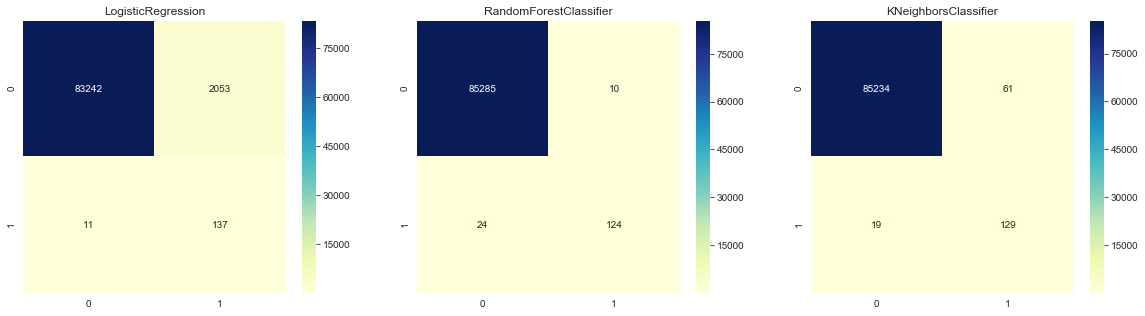

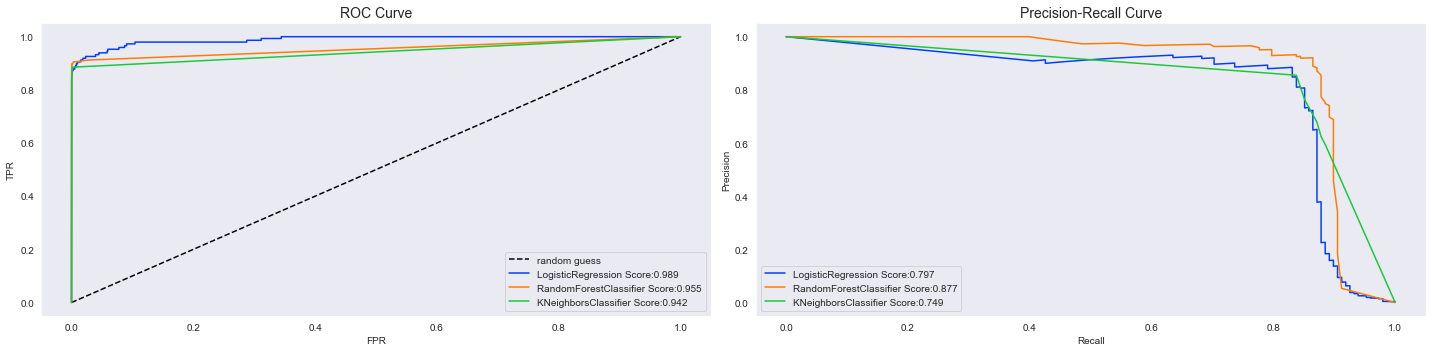

In [31]:
com_result(Xtrain_oversample, ytrain_oversample, Xtest, ytest)

## After coefficient values feature selection

Confusion Matrix:  LogisticRegression 
 [[82819  2476]
 [   12   136]]
Classifiers: LogisticRegression Has a accuracy score of 97.088% 
Classifiers: LogisticRegression Has a recall score of 91.892%
Classifiers: LogisticRegression Has a precision score of 5.207%
Confusion Matrix:  RandomForestClassifier 
 [[85286     9]
 [   26   122]]
Classifiers: RandomForestClassifier Has a accuracy score of 99.959% 
Classifiers: RandomForestClassifier Has a recall score of 82.432%
Classifiers: RandomForestClassifier Has a precision score of 93.130%
Confusion Matrix:  KNeighborsClassifier 
 [[85220    75]
 [   22   126]]
Classifiers: KNeighborsClassifier Has a accuracy score of 99.886% 
Classifiers: KNeighborsClassifier Has a recall score of 85.135%
Classifiers: KNeighborsClassifier Has a precision score of 62.687%


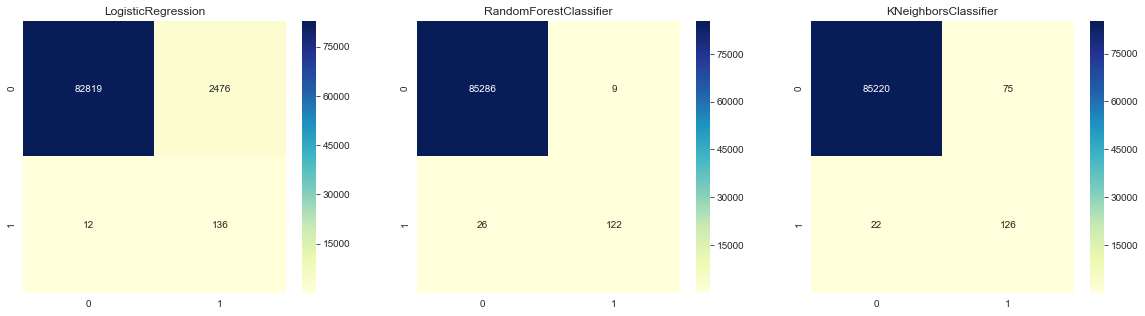

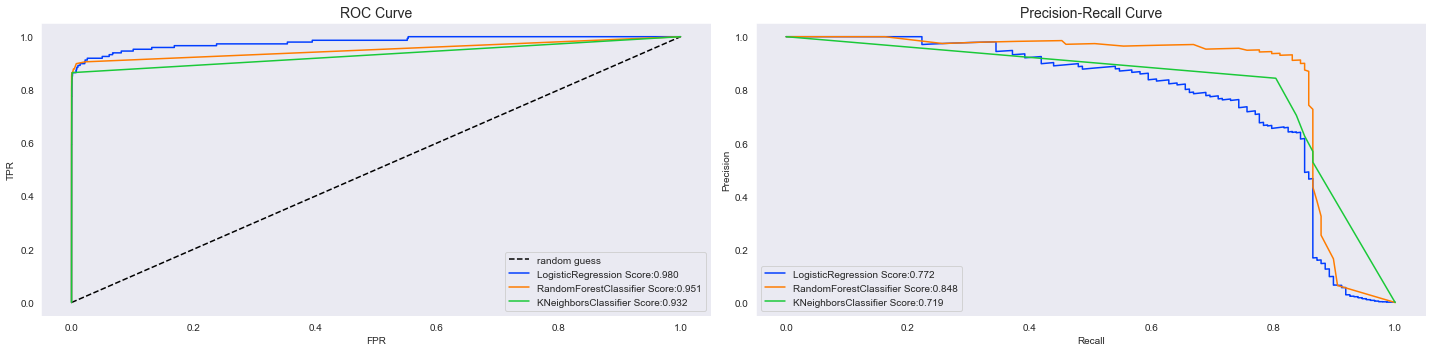

In [32]:
com_result(Xtrain_coe, ytrain_oversample, Xtest_coe, ytest)

## After Select KBest feature selection

Confusion Matrix:  LogisticRegression 
 [[83277  2018]
 [   13   135]]
Classifiers: LogisticRegression Has a accuracy score of 97.623% 
Classifiers: LogisticRegression Has a recall score of 91.216%
Classifiers: LogisticRegression Has a precision score of 6.270%
Confusion Matrix:  RandomForestClassifier 
 [[85288     7]
 [   23   125]]
Classifiers: RandomForestClassifier Has a accuracy score of 99.965% 
Classifiers: RandomForestClassifier Has a recall score of 84.459%
Classifiers: RandomForestClassifier Has a precision score of 94.697%
Confusion Matrix:  KNeighborsClassifier 
 [[85235    60]
 [   21   127]]
Classifiers: KNeighborsClassifier Has a accuracy score of 99.905% 
Classifiers: KNeighborsClassifier Has a recall score of 85.811%
Classifiers: KNeighborsClassifier Has a precision score of 67.914%


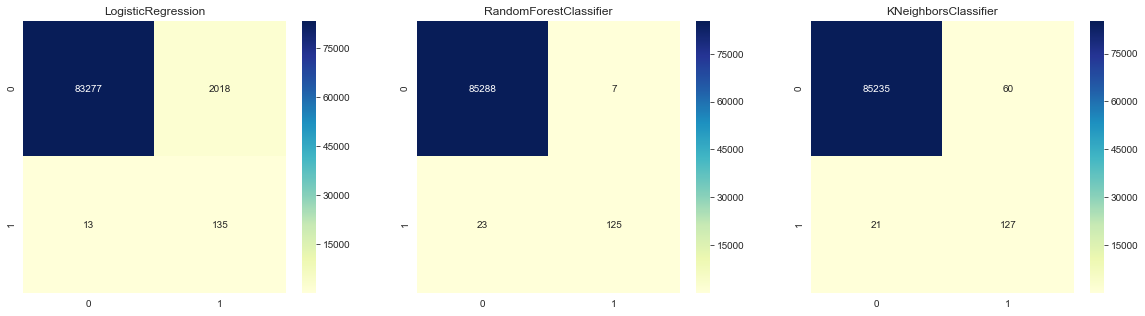

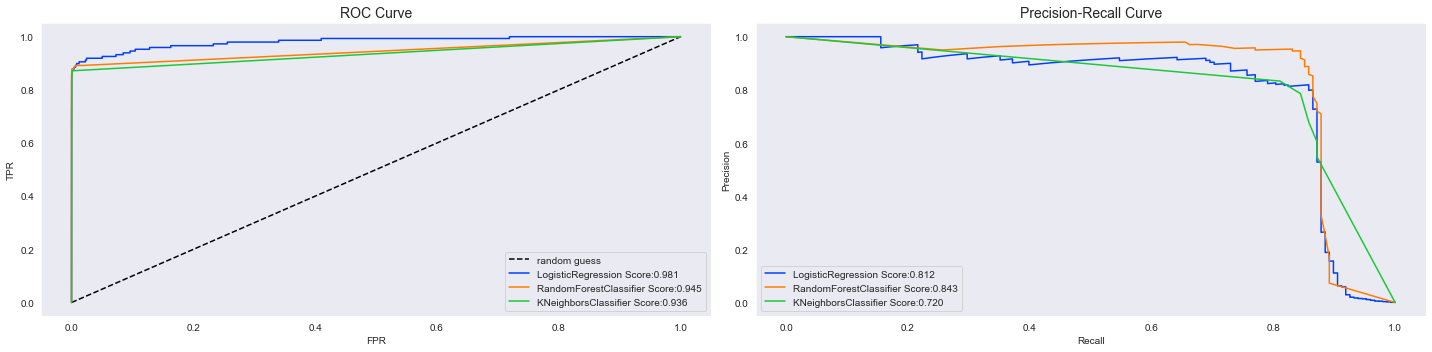

In [33]:
com_result(Xtrain_kb, ytrain_oversample, Xtest_kb, ytest)